### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Raw_Recordings"

In [4]:
ms_ = np.load(dir_path + "/MS-t.npy", allow_pickle= True)
mr_ = np.load(dir_path + "/MR-t.npy", allow_pickle= True)
as_ = np.load(dir_path + "/AS-t.npy", allow_pickle= True)
ar_ = np.load(dir_path + "/AR-t.npy", allow_pickle= True)

In [5]:
ms_.shape

(3, 143, 2560)

#### preview of some signal pieces

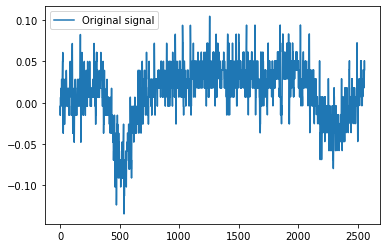

In [6]:
plt.plot(ms_[0][0])
plt.legend(['Original signal'])

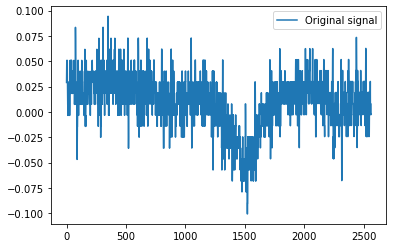

In [7]:
plt.plot(ms_[0][1])
plt.legend(['Original signal'])

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

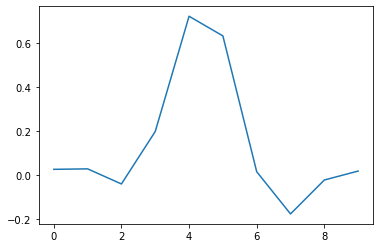

In [8]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(ms_[0][0], w, level=6)

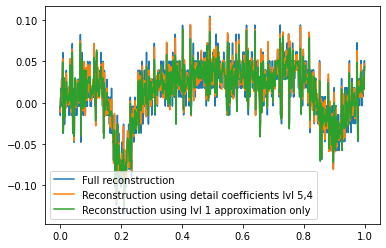

In [9]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

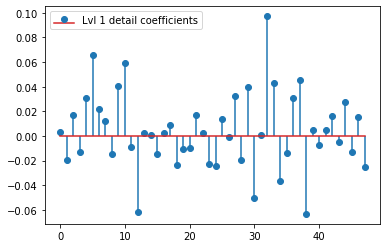

In [10]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

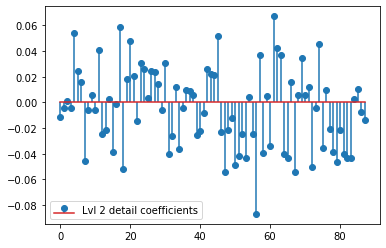

In [11]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


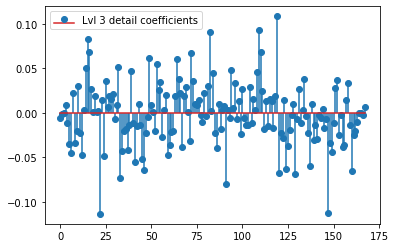

In [12]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


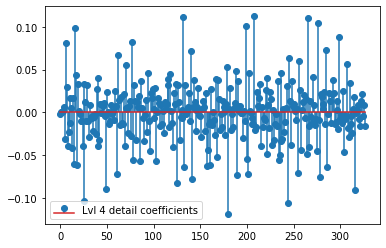

In [13]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


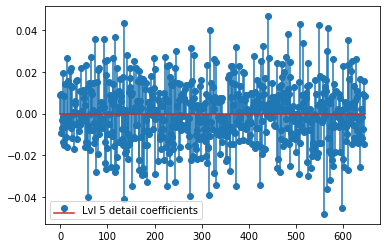

In [14]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


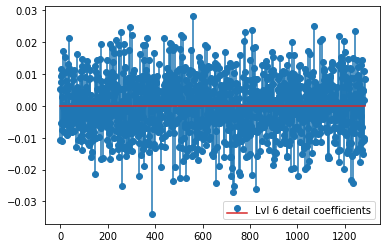

In [15]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [16]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(ms_[0][0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = ms_[0][0] - approx_lvl1_interp

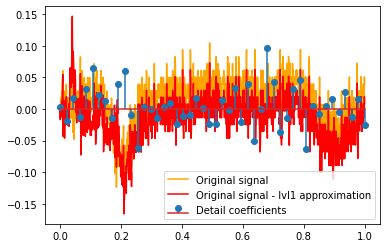

In [17]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(ms_[0][0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

### Now let's get coef for all pieces

In [18]:
coef_ms_x, coef_ms_y, coef_ms_z = [], [], []
for i in range(len(ms_[0])):
    coef_ms_x.append(pywt.wavedec(ms_[0][i], w, level=6))
    coef_ms_y.append(pywt.wavedec(ms_[1][i], w, level=6))
    coef_ms_z.append(pywt.wavedec(ms_[2][i], w, level=6))

In [19]:
coef_mr_x, coef_mr_y, coef_mr_z = [], [], []
for i in range(len(mr_[0])):
    coef_mr_x.append(pywt.wavedec(mr_[0][i], w, level=6))
    coef_mr_y.append(pywt.wavedec(mr_[1][i], w, level=6))
    coef_mr_z.append(pywt.wavedec(mr_[2][i], w, level=6))

In [20]:
coef_as_x, coef_as_y, coef_as_z = [], [], []
for i in range(len(as_[0])):
    coef_as_x.append(pywt.wavedec(as_[0][i], w, level=6))
    coef_as_y.append(pywt.wavedec(as_[1][i], w, level=6))
    coef_as_z.append(pywt.wavedec(as_[2][i], w, level=6))

In [21]:
coef_ar_x, coef_ar_y, coef_ar_z = [], [], []
for i in range(len(ar_[0])):
    coef_ar_x.append(pywt.wavedec(ar_[0][i], w, level=6))
    coef_ar_y.append(pywt.wavedec(ar_[1][i], w, level=6))
    coef_ar_z.append(pywt.wavedec(ar_[2][i], w, level=6))

In [22]:
coef_ms_x = np.array(coef_ms_x)
coef_mr_x = np.array(coef_mr_x)
coef_as_x = np.array(coef_as_x)
coef_ar_x = np.array(coef_ar_x)


Generally each level contains different number of points. Since our aim is to convert these into csv file, I am going to take mean of every level.

In [23]:
print(coef_mr_x[0][0].mean())
print(coef_mr_x[0][1].mean())
print(coef_mr_x[0][2].mean())
print(coef_mr_x[0][3].mean())
print(coef_mr_x[0][4].mean())
print(coef_mr_x[0][5].mean())
print(coef_mr_x[0][6].mean())

-0.34554057087140405
-0.004214814743230787
0.012521625012897586
-0.0004436223498751143
0.001310910794077317
0.00040561102032704355
-4.093625853049714e-05


In [24]:
import pandas as pd

In [25]:
mr = np.stack((coef_mr_x, coef_mr_y, coef_mr_z), axis = 0)
ms = np.stack((coef_ms_x, coef_ms_y, coef_ms_z), axis = 0)
ar = np.stack((coef_ar_x, coef_ar_y, coef_ar_z), axis = 0)
ass = np.stack((coef_as_x, coef_as_y, coef_as_z), axis = 0)


In [26]:
mr.shape

(3, 591, 7)

### Now we are going to create dataframes for ecah of the axis

In [27]:
def dataframe_creator(array, disease = "None", df = pd.DataFrame()):
    values= []
    for i in range(len(array[1])):
        values.append([[array[0][i][0].mean(), array[0][i][1].mean(), array[0][i][2].mean(), array[0][i][3].mean(),
                        array[0][i][4].mean(), array[0][i][5].mean(), array[0][i][6].mean(),
                        array[1][i][0].mean(), array[1][i][1].mean(), array[1][i][2].mean(), array[1][i][3].mean(),
                        array[1][i][4].mean(), array[1][i][5].mean(), array[1][i][6].mean(),
                        array[2][i][0].mean(), array[2][i][1].mean(), array[2][i][2].mean(), array[2][i][3].mean(),
                        array[2][i][4].mean(),array[2][i][5].mean(), array[2][i][6].mean(), disease]])


        medium = pd.DataFrame(values[i],columns =["lvl_x1", "lvl_x2", "lvl_x3", "lvl_x4", "lvl_x5","lvl_x6", "lvl_x7",
                                        "lvl_y1", "lvl_y2", "lvl_y3", "lvl_y4", "lvl_y5","lvl_y6", "lvl_y7",
                                        "lvl_z1", "lvl_z2", "lvl_z3", "lvl_z4", "lvl_z5","lvl_z6", "lvl_z7",
                                                 "disease"])
        df = pd.concat([df, medium], axis = 0)

    return df

In [28]:
df = dataframe_creator(mr, disease = "MR", 
                         df = pd.DataFrame(columns =["lvl_x1", "lvl_x2", "lvl_x3", "lvl_x4", "lvl_x5","lvl_x6", "lvl_x7",
                                        "lvl_y1", "lvl_y2", "lvl_y3", "lvl_y4", "lvl_y5","lvl_y6", "lvl_y7",
                                        "lvl_z1", "lvl_z2", "lvl_z3", "lvl_z4", "lvl_z5","lvl_z6", "lvl_z7",
                                                 "disease"]))

df = dataframe_creator(ar, disease = "AR", df = df )
df = dataframe_creator(ms, disease = "MS", df = df )
df = dataframe_creator(ass, disease = "AS", df = df )

df.reset_index(drop = True, inplace = True)


In [29]:
df

,lvl_x1,lvl_x2,lvl_x3,lvl_x4,lvl_x5,lvl_x6,lvl_x7,lvl_y1,lvl_y2,lvl_y3,...,lvl_y6,lvl_y7,lvl_z1,lvl_z2,lvl_z3,lvl_z4,lvl_z5,lvl_z6,lvl_z7,disease
0,-0.345541,-0.004215,0.012522,-0.000444,0.001311,0.000406,-0.000041,0.184316,0.007161,-0.008526,...,-0.000194,0.000336,-0.00893,0.014729,-0.000682,0.001794,-0.002966,-0.000648,0.000022,MR
1,-0.273343,0.000739,-0.00322,-0.001112,-0.001604,-0.000032,0.000201,0.096459,-0.004564,0.007695,...,-0.000205,-0.000153,-0.003166,-0.009535,0.003375,0.001396,0.003397,-0.00024,0.00018,MR
2,-0.263624,0.000413,-0.005284,-0.001486,-0.000138,-0.000489,0.000041,-0.003456,-0.01007,0.005924,...,-0.000268,0.000045,-0.015194,0.001137,-0.012409,-0.002628,-0.003446,0.000506,0.000256,MR
3,-0.341478,-0.004371,0.014861,0.007202,0.000489,0.00058,0.000105,0.024758,0.008543,-0.016927,...,-0.000195,0.000188,-0.000652,0.005726,0.012457,-0.006032,0.000547,0.00021,-0.000077,MR
4,-0.34343,-0.002166,-0.007141,-0.002059,-0.000725,-0.00004,0.00009,0.105367,-0.00391,0.018414,...,-0.000061,0.00008,0.008253,-0.000452,-0.01651,-0.00337,-0.004062,0.000638,0.00056,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0.016465,0.002972,-0.001682,0.000326,-0.000033,-0.000025,-0.00011,0.014407,-0.006621,0.000462,...,-0.000558,0.000046,-0.013158,0.005745,-0.000063,-0.002661,-0.000458,0.000953,-0.000036,AS
1458,-0.087744,-0.001489,-0.002959,-0.001529,-0.000229,-0.000535,-0.000055,0.017711,0.001009,-0.00176,...,-0.000706,0.000009,-0.005433,-0.003203,-0.000196,-0.002334,0.000109,0.000327,0.000032,AS
1459,-0.077756,-0.001602,0.001775,0.000274,0.000203,-0.000447,-0.000076,0.046979,-0.001092,0.002223,...,0.000598,-0.000034,-0.012073,-0.004608,-0.000312,0.001894,-0.001521,-0.000648,0.000181,AS
1460,-0.045109,0.001392,-0.000355,-0.000908,0.000429,0.000397,-0.000011,0.00565,-0.00479,0.003547,...,0.000032,0.00012,-0.011019,0.005633,0.002005,-0.002387,-0.001169,0.000117,0.000156,AS


In [30]:
df.to_csv(dir_path + '/wavelet_coef.csv')

### Level by level

In [31]:
mr_lvl = np.stack((coef_mr_x, coef_mr_y, coef_mr_z), axis = 0)
ar_lvl = np.stack((coef_ar_x, coef_ar_y, coef_ar_z), axis = 0)
ass_lvl = np.stack((coef_as_x, coef_as_y, coef_as_z), axis = 0)
ms_lvl = np.stack((coef_ms_x, coef_ms_y, coef_ms_z), axis = 0)

In [32]:
mr_lvl[0][0][0]

array([-0.50307835, -0.508493  , -0.4951243 , -0.46168608, -0.32757294,
       -0.46350531, -0.3193573 , -0.29007   , -0.37221437, -0.67080399,
       -0.62598882, -0.57325787, -0.52349109, -0.46328766, -0.48305718,
       -0.42148121, -0.51144431, -0.4147371 , -0.26449246, -0.30814233,
       -0.36570939, -0.30106161, -0.20841103, -0.26656814, -0.22824803,
       -0.27952336, -0.24243609, -0.37123536, -0.24976888, -0.2782866 ,
       -0.23263548, -0.21612474, -0.22409022, -0.2550375 , -0.29713406,
       -0.16293268, -0.19111076, -0.17702556, -0.25617878, -0.20242171,
       -0.25389936, -0.22203721, -0.1730669 , -0.26262785, -0.45008832,
       -0.41084164, -0.40260082, -0.40355966])

In [33]:
def level_coef_extractor_3d(array, lvl = 0):
    
    lenn = array[0][0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0], array.shape[1], lenn)) #219,48
    
    for i in range(array.shape[1]):
        coef[0,i,:] = array[0][i][lvl]
        coef[1,i,:] = array[1][i][lvl]
        coef[2,i,:] = array[2][i][lvl]
        
    return coef

In [34]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [35]:
for i in range(7):
    saver(mr_lvl, i, dir_path, 'mr')
    saver(ms_lvl, i, dir_path, 'ms')
    saver(ass_lvl, i, dir_path, 'as')
    saver(ar_lvl, i, dir_path, 'ar')

In [36]:
mr_lvl[0][0][0].shape #x,y,z #591 #level coef 

(48,)

### Check whether each data saved correctly

In [37]:
def column_namer(level = 0, lenght = 48):
    x, y, z = [], [], []
    for i in range(lenght):
        x.append("lvl{0}_x{1}".format(level, i))
        y.append("lvl{0}_y{1}".format(level, i))
        z.append("lvl{0}_z{1}".format(level, i))
    
    return x + y + z

In [38]:
def dataframe_checker(path,  disease = "None", df = pd.DataFrame(), level = 0):

    values, dis  = [], [] 
    dis.append(disease)
    array = np.load(path + "/" + disease + "_lvl_{}.npy".format(level), allow_pickle = True)
    columns = column_namer(level = level, lenght = array.shape[2])
    
    for i in range(array.shape[1]):
        values.append(array[0][i].tolist()+ array[1][i].tolist()+ array[2][i].tolist() + dis) 

        medium = pd.DataFrame([values[i]], columns = columns + ["disease"])
        
        df = pd.concat([df, medium], axis = 0)
        
    
    display(df)

In [39]:
for i in range(7):
    dataframe_checker(dir_path, 'MR',  level = i )

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease
0,-0.503078,-0.508493,-0.495124,-0.461686,-0.327573,-0.463505,-0.319357,-0.290070,-0.372214,-0.670804,...,-0.009975,-0.013297,0.031506,0.034660,0.121152,0.158909,0.128339,0.134332,0.149062,MR
0,-0.337088,-0.358658,-0.344212,-0.297174,-0.193528,-0.346729,-0.177544,-0.201896,-0.263341,-0.287319,...,-0.044484,-0.025730,0.040819,-0.007631,-0.004883,-0.056402,-0.067213,-0.057641,-0.039950,MR
0,-0.382271,-0.409044,-0.397055,-0.353910,-0.297396,-0.389712,-0.234055,-0.194504,-0.231223,-0.298895,...,0.029110,0.004084,-0.041428,-0.044852,-0.034972,0.053526,0.039660,0.035398,0.031143,MR
0,0.071162,0.089320,0.064081,-0.037265,-0.353574,-0.289820,-0.397483,-0.365879,-0.382827,-0.204690,...,-0.078633,-0.044265,-0.024217,-0.029692,0.051737,0.043672,0.048377,0.047015,0.038573,MR
0,-0.790181,-0.790978,-0.778167,-0.723883,-0.509830,-0.586515,-0.283325,-0.336158,-0.268263,-0.318504,...,0.017597,-0.019702,-0.037006,0.019880,0.066369,0.091973,0.078102,0.079841,0.083903,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,63.742838,64.338464,64.162864,63.251450,62.750569,64.401888,63.650247,63.130427,63.169219,63.330149,...,-114.157432,-113.683692,-114.997003,-107.116038,-115.644566,-123.286642,-120.534105,-120.583293,-121.421039,MR
0,0.941629,3.000033,1.749895,-4.921066,-18.891363,-11.990879,-4.611578,-10.719829,-22.434753,-28.597615,...,23.050368,23.285138,23.320010,23.307050,23.240363,23.078858,23.133478,23.132477,23.113200,MR
0,-16.518110,-16.526668,-16.509660,-16.449626,-16.246396,-16.399573,-16.351801,-16.416887,-16.310547,-16.356513,...,22.835193,22.568896,22.254766,22.314253,21.842024,21.809302,21.797335,21.816321,21.850241,MR
0,-14.776721,-14.834784,-14.764587,-14.498722,-13.706747,-13.947318,-13.606389,-13.540252,-13.371148,-13.128341,...,8.448238,8.440508,7.639474,7.235823,6.779885,6.931241,6.914658,6.912716,6.931565,MR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease
0,-0.025953,0.010480,-0.013679,0.026700,0.001862,-0.106750,-0.009930,0.068671,0.095548,0.139782,...,0.112285,0.016719,0.029684,-0.017811,-0.082988,-0.032424,0.015163,-0.020217,0.008723,MR
0,-0.020565,0.002759,-0.006421,0.007505,0.044998,-0.019214,0.009748,-0.016446,0.057634,0.017310,...,0.039628,-0.130101,-0.000706,-0.115874,-0.105244,-0.072499,0.025298,-0.035728,0.036857,MR
0,-0.017070,-0.001316,-0.003122,0.001773,0.063093,-0.021589,0.032411,0.042343,0.051091,-0.013649,...,-0.023251,-0.083589,0.010553,0.076328,0.054991,0.045093,-0.010041,0.016866,-0.024588,MR
0,0.019253,0.017603,-0.012015,-0.001946,-0.042188,-0.073136,0.055486,0.007144,0.005885,0.009153,...,-0.119288,-0.083512,-0.014144,0.096126,0.062589,0.013885,-0.002486,0.004598,0.001894,MR
0,0.007071,-0.022334,0.020683,-0.000883,-0.028089,0.017160,-0.084686,-0.005961,-0.022015,-0.047229,...,-0.041323,0.104042,0.032997,0.014788,-0.018577,-0.005520,0.005692,-0.006219,0.000175,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.225585,0.417581,-0.363367,0.414908,-1.327686,1.066447,-0.068046,-0.314734,0.496626,-0.453575,...,-0.230563,-0.240216,0.248419,-5.600051,6.297641,-0.749351,0.326485,-0.253386,1.917512,MR
0,-1.590026,3.521805,-3.204139,2.264350,-3.905592,-1.303938,0.064726,0.885083,-7.015753,-14.298233,...,-0.152038,-0.160643,-0.102997,-0.096759,0.125127,-0.015058,0.003607,-0.003249,0.038716,MR
0,-0.006198,-0.010762,0.007941,0.010211,0.002359,-0.112589,-0.038277,-0.076720,-0.187212,-0.287215,...,0.481494,-0.292853,-0.062516,0.232304,-0.038705,-0.124452,0.062263,-0.079110,0.101422,MR
0,-0.051323,-0.033315,0.018558,0.020512,0.136034,-0.170094,-0.153799,0.072053,0.238285,0.068784,...,-0.976540,-0.100520,-0.291394,0.098555,-0.059935,0.026402,-0.004675,0.007077,-0.027568,MR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z79,lvl0_z80,lvl0_z81,lvl0_z82,lvl0_z83,lvl0_z84,lvl0_z85,lvl0_z86,lvl0_z87,disease
0,-0.020747,0.018331,-0.018229,0.030878,-0.038900,-0.125199,0.146685,-0.036869,0.081979,0.097629,...,-0.002622,0.092839,-0.160201,0.137865,0.079637,-0.004585,-0.015175,0.010208,0.024488,MR
0,-0.001745,-0.003163,0.003563,0.009858,-0.042621,-0.019301,0.076852,0.036990,0.047629,0.097096,...,0.008761,0.060904,-0.202547,-0.133525,0.111613,-0.011254,-0.015520,0.012057,0.035061,MR
0,-0.029329,0.020166,-0.021850,0.033198,-0.017044,-0.103156,-0.004308,0.031791,-0.039888,0.113182,...,0.021106,-0.178928,-0.061730,0.113571,-0.119526,-0.005036,-0.015568,0.008198,-0.016380,MR
0,0.023533,-0.001998,0.006096,-0.012710,-0.046842,0.057966,0.062695,0.047672,-0.068819,0.104256,...,0.266078,0.071390,-0.041467,0.086731,-0.009386,0.002935,0.002019,-0.001713,-0.003520,MR
0,-0.017256,-0.001068,-0.003148,-0.006728,0.102274,-0.014439,-0.058474,0.165703,-0.075606,-0.001427,...,-0.015325,-0.035628,-0.095755,0.267494,0.070402,0.004675,-0.003560,0.001853,0.014396,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.205475,0.090104,-0.028693,0.057725,-1.066204,0.242691,0.022176,-0.022187,0.010227,0.207537,...,0.915415,1.066467,0.611039,2.191291,0.069467,0.415999,0.192730,-0.052592,-0.271057,MR
0,2.632785,-0.320181,0.887220,0.268777,-12.244484,4.181273,-3.061975,-0.532469,-0.790626,0.120019,...,-0.032336,-0.063545,0.096490,-0.114728,-0.017712,-0.002435,0.000022,0.000705,-0.001531,MR
0,-0.011228,-0.002606,0.000316,0.000916,0.040681,-0.027537,0.074204,-0.114546,-0.004451,0.041773,...,-0.210452,0.062901,0.070419,-0.091401,0.068891,-0.026909,-0.068451,0.050401,0.043956,MR
0,-0.055641,-0.003628,-0.005696,0.030693,0.072974,-0.047009,0.027385,-0.103583,0.110068,0.029727,...,-0.003254,0.082515,0.121457,0.065761,-0.039569,-0.007366,-0.013582,0.007207,0.000581,MR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z159,lvl0_z160,lvl0_z161,lvl0_z162,lvl0_z163,lvl0_z164,lvl0_z165,lvl0_z166,lvl0_z167,disease
0,0.001620,0.005169,-0.002954,0.009173,-0.048077,-0.015534,0.055708,-0.050740,-0.019327,0.015090,...,-0.357233,0.029967,-0.066629,0.059384,0.042417,-0.000284,6.429684e-04,0.009927,-0.029394,MR
0,0.011819,-0.013488,0.013032,-0.012342,0.021610,-0.032848,0.014015,-0.020763,0.041844,-0.002824,...,0.122589,0.075494,-0.029615,-0.003314,0.000819,-0.001295,5.307244e-04,0.002456,-0.008140,MR
0,-0.017339,0.016312,-0.015440,0.027567,-0.061052,-0.006746,0.028606,-0.008328,0.031900,-0.011389,...,-0.076894,-0.053409,0.056889,-0.012365,0.040032,-0.003780,-1.798009e-04,0.009287,-0.031830,MR
0,0.018877,-0.006250,0.007433,-0.017166,0.020334,-0.033084,-0.017202,0.008855,-0.034312,0.036094,...,-0.078641,-0.058003,0.001017,-0.016097,-0.006298,-0.000489,-5.097667e-05,-0.001423,0.003139,MR
0,-0.012009,0.001750,-0.002374,0.012122,-0.033586,0.081511,-0.068265,-0.114909,0.091239,-0.015148,...,-0.169899,0.086126,0.029027,0.022302,0.005583,-0.001409,2.018568e-04,0.001636,-0.002894,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.177356,0.006821,0.014786,-0.149729,0.149776,-0.299240,0.204583,-0.157881,0.249896,-0.034016,...,-1.484306,-3.242522,0.383251,1.287302,-0.171977,0.141898,5.012220e-03,-0.115838,0.421835,MR
0,0.605516,0.087709,-0.109731,-2.127506,7.232854,3.139300,4.550988,-3.059272,-1.514796,2.737668,...,0.034069,-0.061429,0.020808,0.025671,-0.010898,0.002332,1.893121e-05,-0.003511,0.016527,MR
0,-0.000175,-0.006485,0.005871,0.000216,-0.005892,0.017920,-0.045682,0.020823,-0.030878,0.027741,...,0.031409,-0.029229,0.013894,-0.004140,0.105659,-0.003844,1.678090e-03,0.026471,-0.100914,MR
0,-0.045579,0.014963,-0.018986,0.037390,-0.007117,0.008233,0.014716,0.031319,-0.013000,-0.010474,...,-0.018901,-0.065294,0.062901,0.054424,0.033949,-0.002027,-1.266984e-04,0.007695,-0.014293,MR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z318,lvl0_z319,lvl0_z320,lvl0_z321,lvl0_z322,lvl0_z323,lvl0_z324,lvl0_z325,lvl0_z326,disease
0,0.016258,-0.008120,0.009703,-0.013731,-0.001086,0.009476,0.013287,0.026583,-0.050501,0.024093,...,0.052338,-0.022126,0.019244,-0.004468,-0.023927,-0.034694,5.433366e-03,-1.173996e-02,0.023439,MR
0,-0.007635,-0.002112,-0.000228,-0.006067,0.051220,0.026646,0.002979,-0.002938,-0.011500,0.025912,...,-0.024262,0.027029,-0.025830,-0.019475,0.006566,-0.031614,8.976999e-03,-1.384474e-02,0.029302,MR
0,-0.018196,0.016301,-0.016925,0.021602,-0.023798,0.003826,0.005649,0.013539,0.029621,-0.002314,...,-0.044679,0.003257,0.009653,-0.014660,-0.040620,-0.025040,4.389361e-03,-9.293293e-03,0.011534,MR
0,0.006829,-0.001480,0.002214,-0.010079,0.017559,-0.000810,0.002718,0.027344,0.021446,-0.039068,...,0.014138,-0.014013,0.016076,-0.000273,-0.002494,0.005478,-1.221109e-03,2.194510e-03,-0.005283,MR
0,0.003705,-0.004081,0.004103,0.000325,-0.004455,-0.038687,-0.016007,0.008223,-0.011037,-0.080993,...,0.040955,-0.013289,0.000955,-0.010536,-0.005680,-0.012353,3.447043e-03,-5.306280e-03,0.009500,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.057128,0.001602,0.003379,-0.040950,-0.011410,0.057024,-0.240245,0.067798,0.008815,-0.034907,...,0.664566,-0.578960,0.035136,0.190637,1.087832,0.432346,-9.280372e-02,1.763614e-01,-0.125582,MR
0,-0.010576,-0.178484,0.207404,-0.000243,-3.678824,11.904289,17.713342,-1.942532,2.114219,1.785005,...,-0.006734,-0.009459,-0.021369,-0.006777,-0.029433,-0.005688,6.782538e-04,-2.104543e-03,-0.001199,MR
0,-0.003013,-0.004729,0.003250,-0.004886,0.027019,0.033089,-0.015079,-0.018791,-0.018440,-0.006410,...,0.048233,0.016150,0.016925,-0.006251,0.027703,-0.097930,2.452706e-02,-4.015162e-02,0.088158,MR
0,-0.015401,0.007877,-0.008218,0.027292,-0.053997,-0.050238,0.002070,-0.051501,0.035010,-0.005155,...,-0.030894,0.034462,-0.031600,0.061047,-0.045934,-0.038792,8.700920e-03,-1.658322e-02,0.023456,MR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z637,lvl0_z638,lvl0_z639,lvl0_z640,lvl0_z641,lvl0_z642,lvl0_z643,lvl0_z644,lvl0_z645,disease
0,0.016591,-0.016592,0.015846,-0.019145,0.033320,-0.020663,0.000182,0.019230,-0.004992,0.004472,...,0.010703,-0.038088,-2.322471e-02,-2.201717e-02,-3.647024e-02,-9.907298e-03,-1.608439e-02,1.135586e-02,2.740593e-05,MR
0,-0.010660,0.007129,-0.007204,0.009637,-0.014631,0.026640,-0.008335,-0.007283,-0.006529,-0.004671,...,0.008414,-0.002722,1.779337e-02,-1.926960e-02,-1.894694e-02,4.306496e-02,-3.368360e-02,3.738935e-02,-4.115638e-02,MR
0,-0.042324,0.052488,-0.050297,0.043016,-0.041809,0.004139,-0.007043,-0.030713,0.013236,0.006713,...,0.045795,0.004703,3.264896e-03,2.546217e-03,-7.406372e-03,8.797870e-03,-1.706323e-02,1.608433e-02,-9.948573e-03,MR
0,0.023928,-0.024007,0.024114,-0.018204,-0.007964,0.008175,0.004419,-0.004977,0.003665,0.009307,...,-0.015390,0.015780,2.518477e-02,-2.504912e-03,7.679925e-03,-5.024978e-03,4.073216e-03,-4.535803e-03,6.135346e-03,MR
0,-0.002183,-0.000315,-0.000379,-0.002376,0.021784,-0.008812,-0.000153,0.014494,-0.008519,-0.002043,...,0.039980,-0.010416,-2.016779e-02,1.798387e-02,1.097106e-02,1.454452e-02,-7.769675e-03,9.721473e-03,-1.026679e-02,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.073749,0.114367,-0.108614,0.059658,-0.003120,-0.013201,-0.008160,0.019691,-0.040805,0.020712,...,-0.227711,0.470191,-5.068155e-01,2.867129e-01,-2.811566e-01,-2.924992e-01,2.995270e-01,-3.165727e-01,2.101434e-01,MR
0,-0.732822,1.079477,-1.042997,0.482686,0.831410,-1.278968,-1.902509,11.944204,10.742172,-9.667689,...,0.011414,-0.001265,2.893107e-03,1.324006e-02,3.348347e-03,-4.025100e-03,-6.710161e-04,-3.397061e-04,3.755379e-03,MR
0,-0.009176,0.005421,-0.005998,0.005493,0.004729,0.011729,-0.002389,0.018521,-0.018642,0.006154,...,-0.012639,0.025080,-2.334495e-02,7.227256e-03,-1.455794e-02,6.527240e-02,-7.507502e-02,7.662045e-02,-5.850610e-02,MR
0,-0.017785,0.022475,-0.021098,0.013921,-0.001243,0.006614,-0.029166,-0.019635,0.006461,0.012371,...,0.008066,-0.008458,8.018407e-03,-1.232417e-02,7.697997e-03,1.742012e-02,-2.668942e-02,2.633031e-02,-1.464235e-02,MR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z1275,lvl0_z1276,lvl0_z1277,lvl0_z1278,lvl0_z1279,lvl0_z1280,lvl0_z1281,lvl0_z1282,lvl0_z1283,disease
0,0.005247,-0.003399,0.003611,-0.001061,-0.015464,0.003353,-0.003437,0.007740,-0.006150,0.004212,...,0.014095,2.627423e-02,-7.970347e-03,5.019509e-03,-1.711606e-02,1.743556e-02,-1.673285e-02,1.753545e-02,-1.959012e-02,MR
0,-0.001381,-0.016206,0.012358,0.003791,0.000286,0.001306,-0.003672,-0.004224,0.004416,-0.007099,...,0.008654,1.207097e-03,-3.496846e-03,1.451331e-02,1.030189e-02,7.802173e-03,4.234350e-02,-3.160192e-02,-1.021089e-02,MR
0,0.001319,0.004429,-0.002230,0.000458,-0.009479,-0.015180,-0.003204,-0.005393,-0.002548,0.006166,...,0.009248,4.929797e-04,-8.188360e-04,-5.112044e-03,2.529398e-03,-1.430703e-02,-1.527143e-02,7.913278e-03,1.650529e-02,MR
0,-0.002094,-0.006710,0.003666,0.002093,0.012642,-0.010554,0.014829,0.013290,0.010938,-0.001469,...,0.019429,-5.883276e-03,8.714010e-03,1.721730e-03,-1.729414e-02,9.450127e-03,-1.467700e-02,1.357742e-02,-1.055059e-02,MR
0,-0.004760,-0.000344,-0.000671,0.002267,0.008164,-0.002077,0.014696,0.001757,0.005117,-0.023552,...,-0.020704,2.654804e-02,-1.383617e-02,-1.435068e-02,6.736849e-03,-2.609703e-02,1.933144e-02,-2.140396e-02,2.368653e-02,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.009554,-0.039902,0.034658,-0.005284,0.000134,0.012275,-0.006513,-0.000055,0.012345,-0.009548,...,0.362068,-4.322450e-01,4.041611e-01,-2.634566e-01,2.484891e-01,-1.609523e-01,-2.138380e-01,1.313385e-01,2.321947e-01,MR
0,0.473058,-0.668027,0.656820,-0.410133,0.002227,0.105681,0.203687,-0.920597,0.901045,-1.227082,...,0.004030,-4.974319e-03,7.680116e-03,-4.477665e-05,-8.506836e-04,-2.910590e-03,-3.510796e-05,-4.314332e-04,1.854848e-03,MR
0,0.001787,0.002049,-0.000528,-0.006268,0.011068,0.005881,0.012115,0.003995,-0.007512,0.001774,...,0.020592,-2.416115e-02,1.974959e-02,2.608676e-05,-6.565228e-03,1.694878e-02,-1.927335e-02,1.689916e-02,-1.169506e-02,MR
0,0.023929,-0.014781,0.017440,-0.024540,0.018447,-0.026495,-0.001140,0.008721,0.010707,-0.010802,...,0.000369,3.179076e-03,5.222531e-03,-9.327037e-03,4.065662e-03,5.799606e-03,-9.146671e-03,8.002901e-03,-2.515875e-03,MR


In [40]:
for i in range(7):
    dataframe_checker(dir_path, 'AR',  level =i )

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease
0,1.123005,1.122859,1.115211,1.105150,1.036671,1.087003,1.091806,1.078034,1.005074,1.042948,...,-10.202812,-10.143472,-10.232224,-10.264524,-10.197523,-10.072363,-10.098939,-10.104841,-10.102715,AR
0,1.261548,1.262970,1.260132,1.243844,1.193366,1.152058,1.223458,1.193290,1.207023,1.205837,...,-9.547184,-9.597205,-9.479007,-9.454489,-9.470430,-9.523432,-9.512222,-9.509654,-9.512221,AR
0,1.094222,1.095942,1.101265,1.105493,1.154859,1.150123,1.156790,1.160598,1.192276,1.195095,...,-8.830978,-8.931424,-8.777848,-8.875097,-8.685819,-8.564714,-8.600117,-8.603023,-8.602343,AR
0,1.168042,1.174671,1.169301,1.143451,1.079475,1.054534,1.062631,1.083396,1.088302,1.036447,...,-8.056767,-8.185563,-8.140377,-8.142808,-7.966297,-7.869843,-7.881921,-7.891248,-7.904920,AR
0,0.928575,0.909092,0.907486,0.918412,0.848598,0.879052,0.834466,0.860974,0.883775,0.903603,...,-7.352365,-7.232675,-7.338689,-7.399421,-7.333265,-7.351931,-7.335817,-7.340670,-7.353932,AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-2.359970,-2.353441,-2.357438,-2.374398,-2.405738,-2.411207,-2.366381,-2.297753,-2.390322,-2.310145,...,2.510032,2.412418,2.421607,2.480735,2.324668,2.308038,2.314229,2.316253,2.322063,AR
0,-2.269818,-2.269968,-2.269127,-2.277223,-2.295375,-2.368441,-2.383128,-2.419102,-2.465128,-2.350904,...,2.482816,2.411365,2.450615,2.388461,2.577673,2.715436,2.677074,2.672000,2.676957,AR
0,-2.592098,-2.609276,-2.601932,-2.557015,-2.479870,-2.418955,-2.335579,-2.428392,-2.336065,-2.405322,...,0.391781,0.402738,0.332010,0.079303,0.095152,0.192719,0.112109,0.135927,0.185002,AR
0,-5.252989,-5.168893,-5.270443,-5.685034,-7.261705,-6.351891,-17.131119,-24.570127,-29.396022,-38.109660,...,-10.891567,-12.604032,-15.785231,-17.443317,-12.508859,-11.478596,-11.792719,-11.881908,-11.955030,AR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease
0,0.037195,-0.025629,0.027592,-0.025774,-0.013642,-0.014234,-0.060872,-0.013259,0.007859,-0.102955,...,-0.000542,0.036795,-0.013786,0.015503,-0.046857,0.053564,-0.021948,0.027882,-0.054185,AR
0,0.004405,0.004414,-0.003393,0.004005,-0.012048,-0.090338,0.016930,-0.022903,0.004531,-0.025618,...,-0.073500,0.023645,0.040002,0.018746,0.043243,-0.020832,0.010368,-0.012361,0.026503,AR
0,-0.033019,0.023010,-0.024859,0.023626,0.010087,0.016339,0.059474,0.015733,-0.007961,-0.052438,...,-0.035776,0.033266,0.070259,0.059262,-0.001692,0.041194,-0.010742,0.015735,-0.034651,AR
0,-0.000954,0.007956,-0.006774,0.005499,-0.020853,0.004019,-0.037525,-0.020289,-0.055021,-0.050180,...,-0.032040,-0.065099,0.008362,0.057955,0.054954,0.078362,-0.028194,0.038812,-0.053998,AR
0,0.013289,-0.016736,0.015489,-0.026238,0.054317,0.076831,0.005124,-0.030407,0.003110,0.032019,...,-0.007605,-0.018719,-0.067396,0.044108,0.062267,0.031395,-0.014222,0.018426,-0.012910,AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000526,0.003003,-0.001991,0.000855,-0.020701,0.048505,0.044730,-0.017777,0.034637,-0.010101,...,0.028048,-0.038594,0.049104,0.039804,-0.019584,-0.019208,0.006398,-0.009352,0.012671,AR
0,-0.014822,0.014424,-0.014677,0.011759,0.003524,-0.014267,0.007150,0.027496,0.011567,-0.000789,...,0.128092,0.049415,-0.079386,0.029250,-0.095955,0.050238,-0.024246,0.028264,-0.062107,AR
0,0.017071,-0.020082,0.019669,-0.024589,0.045778,-0.001887,-0.006050,-0.050707,-0.013029,-0.007236,...,-0.056129,0.070250,0.500322,0.512442,-0.150966,-0.130044,0.068878,-0.090253,0.077341,AR
0,-0.070583,0.198615,-0.178758,0.025349,0.325057,-0.722611,1.011285,0.504495,3.052137,0.594289,...,1.438290,1.534032,0.175916,1.215382,-0.861661,0.720640,-0.418793,0.465840,-0.815797,AR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z79,lvl0_z80,lvl0_z81,lvl0_z82,lvl0_z83,lvl0_z84,lvl0_z85,lvl0_z86,lvl0_z87,disease
0,0.001383,-0.003037,0.000347,-0.017173,0.110148,-0.122987,-0.009897,-0.069009,0.000523,0.132506,...,-0.019929,-0.022375,0.005482,0.020085,-0.068026,-0.000243,0.006976,-0.007272,-0.014639,AR
0,0.001401,-0.001496,0.002088,-0.005334,-0.004666,0.095618,-0.056653,-0.036472,-0.003875,0.029864,...,-0.051582,0.049233,-0.032362,-0.051022,-0.010101,-0.002252,-0.008701,0.007157,0.000571,AR
0,-0.007082,0.012747,-0.010225,0.024854,-0.095093,0.006947,0.079907,-0.021169,-0.008472,0.008496,...,0.130008,-0.124405,-0.044379,0.081133,-0.100723,-0.005666,-0.013138,0.006693,-0.013774,AR
0,0.005829,0.003078,-0.001646,0.004110,-0.023638,-0.065872,0.002149,0.082370,0.050058,-0.089449,...,0.011117,0.011846,-0.005675,0.163740,-0.103647,0.010293,0.016014,-0.013310,-0.031042,AR
0,-0.011660,0.005211,-0.007487,0.003530,0.041057,-0.048048,0.013969,0.020519,0.057570,-0.089986,...,0.091585,0.052826,0.015626,-0.008327,-0.023628,-0.000331,0.009970,-0.008447,-0.004764,AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.006620,-0.003439,0.004210,-0.005583,-0.009806,0.032137,0.068217,0.031224,0.015679,-0.051977,...,-0.118233,0.025331,0.200671,-0.043549,0.030144,0.000473,-0.000345,0.001511,0.003586,AR
0,0.008884,-0.004565,0.006925,0.001135,-0.067688,0.073256,0.170521,0.088090,-0.007233,0.017687,...,0.024763,0.169288,-0.035483,0.023370,-0.009704,-0.011486,0.004195,-0.007790,0.009174,AR
0,0.040884,-0.043447,0.043385,-0.043452,0.034032,0.003707,0.145713,-0.007246,-0.005731,-0.007990,...,0.595021,-0.020572,0.651153,0.842113,0.409074,0.008575,-0.038053,0.030258,0.080505,AR
0,0.205274,-0.049519,0.086142,-0.015688,-0.796890,0.348494,-0.236532,0.969590,0.496401,1.900145,...,-0.911127,0.488437,0.366661,-0.238792,0.511091,-0.064122,0.365614,-0.309318,0.117764,AR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z159,lvl0_z160,lvl0_z161,lvl0_z162,lvl0_z163,lvl0_z164,lvl0_z165,lvl0_z166,lvl0_z167,disease
0,-0.001527,-0.004560,0.004205,0.005827,-0.029540,0.016305,-0.007500,0.016171,-0.024182,-0.007779,...,0.006002,0.069806,-0.063447,-0.065079,-0.023167,-0.004371,-8.773460e-04,-0.002395,0.010044,AR
0,0.004390,-0.001813,0.002036,-0.004098,0.002608,0.006062,-0.028074,0.033357,-0.020328,0.012854,...,0.030201,-0.092728,-0.050104,-0.005602,0.021618,0.001189,4.523946e-04,0.004336,-0.021062,AR
0,0.007092,0.000993,0.000618,-0.003684,-0.012104,0.013491,0.048438,-0.095939,0.015674,0.045336,...,-0.060224,0.015655,0.012127,-0.065657,0.023948,-0.005502,-3.090948e-04,0.007410,-0.030824,AR
0,-0.000611,0.002814,-0.002628,-0.000925,0.007082,0.013518,-0.069635,-0.012580,0.017348,-0.019913,...,0.024850,-0.016845,0.025655,0.005201,-0.000122,-0.001155,-8.980462e-04,-0.000613,0.007720,AR
0,-0.010376,0.007280,-0.007114,0.015979,-0.036065,-0.001707,-0.021144,-0.025214,0.030998,-0.034737,...,-0.025275,0.067533,-0.047658,-0.034080,-0.043844,-0.001612,-6.287811e-04,-0.008188,0.033334,AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.003560,-0.003639,0.003500,-0.007706,0.013417,0.030888,0.032302,0.002337,-0.024446,0.003734,...,-0.070822,-0.017272,-0.069561,-0.020503,-0.006439,0.001288,2.764984e-04,-0.001373,-0.000910,AR
0,0.012067,-0.009292,0.009138,-0.017322,0.036380,0.009947,-0.040530,-0.010032,-0.036246,0.035369,...,-0.030255,0.055787,0.003852,0.016261,-0.033261,-0.006615,-1.335233e-03,-0.003055,0.037404,AR
0,0.031102,-0.047653,0.043322,-0.052490,0.124566,-0.005104,0.083625,-0.130656,0.053630,-0.011341,...,0.761933,-0.777689,0.576443,-0.301450,-0.062426,-0.012720,2.292800e-03,-0.010789,-0.017411,AR
0,0.055557,-0.034903,0.031786,-0.189669,0.492382,0.645216,1.224797,-0.171146,-0.345906,0.767807,...,1.050233,-0.790406,-0.163205,2.441392,-0.341922,0.017788,-1.842964e-02,-0.074784,0.889370,AR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z318,lvl0_z319,lvl0_z320,lvl0_z321,lvl0_z322,lvl0_z323,lvl0_z324,lvl0_z325,lvl0_z326,disease
0,-0.008149,0.004040,-0.004964,0.000700,0.027500,0.000702,0.002627,-0.012396,-0.005819,0.009207,...,-0.040655,-0.068855,-0.033563,0.029543,0.002318,4.695358e-03,1.214087e-03,-8.086011e-04,-2.226639e-03,AR
0,0.005440,-0.001657,0.002356,-0.004384,0.002742,-0.021827,0.005069,0.003564,-0.002342,0.013899,...,0.009288,-0.015512,0.000695,-0.008419,-0.003516,-4.722482e-03,-1.048254e-03,2.302981e-04,2.235760e-03,AR
0,0.005924,-0.003031,0.002989,-0.004287,0.003727,-0.009432,-0.001097,0.000475,-0.020238,0.004930,...,0.004973,-0.002293,0.004080,0.027905,-0.009249,-1.452474e-02,4.407210e-03,-7.104646e-03,9.955997e-03,AR
0,-0.003851,0.006528,-0.006268,0.006670,-0.008841,-0.023987,-0.008425,0.006883,-0.016795,0.041542,...,0.011487,-0.012362,-0.000456,0.009604,0.023356,2.296413e-02,-4.019332e-03,7.855526e-03,-1.444474e-02,AR
0,-0.003810,0.005995,-0.005278,0.005234,-0.011479,0.005614,0.002390,-0.017812,0.007978,-0.002647,...,-0.032550,0.005202,0.022033,0.016846,-0.028312,4.583019e-03,5.143397e-04,-2.818504e-04,-8.929063e-03,AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.003260,-0.004388,0.004079,-0.003355,0.002234,0.001864,0.023648,-0.007683,-0.014633,0.009903,...,-0.011722,-0.010414,0.011151,0.014614,0.004587,6.515829e-03,-2.331311e-03,3.475365e-03,-4.829844e-03,AR
0,0.002471,-0.002760,0.002372,-0.006428,0.021151,-0.010776,0.008013,0.005586,-0.000166,0.057186,...,0.004473,-0.016107,-0.001097,0.009905,-0.030282,-3.803511e-02,1.502174e-02,-2.217092e-02,2.868997e-02,AR
0,-0.006929,-0.016803,0.010550,-0.013011,0.119782,-0.141826,0.091434,-0.072662,0.000808,-0.030292,...,0.100651,0.102577,-0.251076,0.122832,0.018479,-2.175548e-02,7.771734e-03,-9.864719e-03,2.913678e-02,AR
0,0.046894,-0.015176,0.022113,-0.029064,-0.121205,0.198086,-0.034092,0.544685,-0.489972,1.284039,...,0.014685,-0.125461,0.009779,0.039926,-0.449970,-2.855237e-01,1.084459e-01,-1.744278e-01,1.761461e-01,AR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z637,lvl0_z638,lvl0_z639,lvl0_z640,lvl0_z641,lvl0_z642,lvl0_z643,lvl0_z644,lvl0_z645,disease
0,0.002675,-0.004403,0.004448,0.003208,-0.025188,0.000685,0.004022,0.020760,-0.007237,0.014477,...,0.009389,0.003359,2.522857e-02,-4.093920e-03,-1.650249e-02,3.954911e-02,-2.171521e-02,2.606234e-02,-3.712466e-02,AR
0,0.015131,-0.017838,0.017291,-0.013952,0.006354,0.011448,-0.009903,0.011681,0.001824,-0.004841,...,-0.005173,-0.002903,-5.106769e-03,5.537286e-03,-4.369567e-03,-2.563266e-02,1.167627e-02,-1.495238e-02,2.041616e-02,AR
0,-0.013667,0.015590,-0.015576,0.009074,0.012734,-0.014953,-0.008394,0.006874,-0.000039,0.003329,...,-0.005374,-0.007357,-2.068036e-02,8.660224e-04,1.299181e-02,2.041440e-02,-1.387304e-02,1.610155e-02,-1.502304e-02,AR
0,-0.003571,0.005168,-0.004624,0.006108,-0.018640,0.017754,-0.008792,-0.001599,0.008035,-0.034810,...,-0.008715,-0.013632,-8.779967e-03,2.211301e-02,-3.250435e-03,8.637017e-03,3.742167e-03,-1.723577e-03,-7.448843e-03,AR
0,0.006430,-0.003880,0.004598,-0.002960,-0.015826,0.022556,-0.002257,0.017636,0.011719,-0.009446,...,0.010308,-0.001598,-6.923831e-03,4.865946e-03,3.876140e-03,2.669940e-02,-1.159969e-02,1.507821e-02,-2.196421e-02,AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.004735,0.002330,-0.003025,0.001083,0.016240,-0.012901,0.000509,0.012631,0.013805,0.007429,...,0.011598,-0.008001,1.069007e-02,-1.296074e-03,5.254080e-03,-1.980256e-02,1.366552e-02,-1.542743e-02,1.786237e-02,AR
0,0.009708,-0.013964,0.013166,-0.006737,-0.001611,-0.010583,-0.000462,0.004645,0.000647,0.003429,...,0.005628,-0.007303,-1.886569e-03,-9.689787e-04,-3.167122e-02,1.265409e-01,-8.489055e-02,9.680061e-02,-1.145819e-01,AR
0,-0.024436,0.003786,-0.006561,0.013981,0.013922,0.022018,0.007245,-0.030465,0.023142,-0.003727,...,0.045256,-0.043626,-3.803312e-02,-3.082717e-02,3.241758e-02,1.384807e-02,-3.956247e-03,7.196317e-03,-4.261063e-03,AR
0,0.144618,-0.146615,0.146110,-0.122831,0.027817,-0.001872,0.072277,-0.362752,0.165776,-0.150962,...,-0.030035,-0.098223,9.905720e-02,7.008446e-02,-7.531927e-01,9.930524e-01,-8.171379e-01,8.752066e-01,-1.002885e+00,AR


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z1275,lvl0_z1276,lvl0_z1277,lvl0_z1278,lvl0_z1279,lvl0_z1280,lvl0_z1281,lvl0_z1282,lvl0_z1283,disease
0,0.002509,0.007605,-0.005413,0.001636,-0.018936,-0.010491,0.021503,0.011624,0.005113,0.002565,...,3.577018e-03,-2.581362e-03,1.559279e-02,-8.842117e-03,2.291918e-03,-6.465567e-03,7.208720e-03,-8.407118e-03,7.584960e-03,AR
0,-0.001436,0.004008,-0.003873,0.003820,-0.012071,0.006806,0.003493,-0.004084,-0.010976,0.002250,...,1.833396e-02,-3.629727e-03,-1.450701e-02,-1.534801e-02,9.666983e-03,4.623276e-03,5.808022e-03,-2.175633e-03,-5.033124e-03,AR
0,0.007967,0.005469,-0.001483,-0.010085,-0.002520,0.009738,0.001389,-0.000352,0.003895,0.003784,...,-1.308246e-03,1.073629e-03,-1.097018e-02,1.123633e-02,1.378044e-03,-1.006329e-02,1.114627e-02,-1.166075e-02,9.251100e-03,AR
0,-0.018667,-0.001406,-0.003886,0.017903,0.011183,-0.014570,-0.008850,-0.007518,-0.011067,0.001871,...,9.167123e-03,1.685095e-02,-9.513890e-03,-1.079184e-03,7.186342e-03,-9.610795e-03,-1.742511e-03,-1.467699e-03,1.200745e-02,AR
0,-0.011100,-0.011833,0.005642,0.013143,0.007351,-0.009931,0.006742,0.009041,-0.008412,-0.005989,...,2.209051e-04,1.815812e-02,-1.276308e-02,-1.231527e-02,-2.059400e-03,-2.218124e-02,8.411336e-03,-1.268410e-02,2.068300e-02,AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.001469,0.000594,-0.000424,0.003794,-0.015278,0.010010,-0.006353,0.009380,-0.012136,0.005668,...,7.597889e-03,-6.474062e-03,6.173319e-03,7.558638e-03,-2.426851e-03,1.001734e-03,-3.677321e-03,3.634409e-03,-1.930874e-03,AR
0,-0.003802,0.013718,-0.011603,0.002956,-0.004940,-0.001131,-0.021568,0.011762,-0.003366,-0.002071,...,3.360674e-03,4.451478e-03,6.812661e-03,1.202128e-02,-1.040792e-03,-2.425283e-02,3.583730e-02,-3.740071e-02,2.306598e-02,AR
0,-0.003810,-0.007583,0.006143,0.001572,0.008534,-0.017228,0.015092,0.011929,-0.012620,-0.000027,...,-1.045177e-02,2.854101e-02,-1.587361e-02,2.303977e-02,-1.903659e-03,-2.236279e-02,2.733840e-02,-2.698276e-02,1.807315e-02,AR
0,0.040059,0.000363,0.005002,-0.043122,0.037173,0.004910,-0.012842,0.001932,-0.023742,-0.022729,...,5.266221e-02,-9.811407e-02,-2.212686e-03,1.643451e-01,-3.038026e-01,2.823199e-01,-5.373779e-02,7.819364e-02,-2.904465e-01,AR


In [41]:
for i in range(7):
    dataframe_checker(dir_path, 'MS',  level =i )

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease
0,-0.035446,-0.051501,-0.041161,0.008653,0.122506,0.067336,0.165852,0.158740,0.143649,0.001051,...,0.069338,0.063978,0.140405,0.108285,0.214704,0.133073,0.147185,0.149286,0.145163,MS
0,0.312148,0.325089,0.318153,0.278285,0.197400,0.161428,0.181343,0.237180,0.233554,0.272637,...,0.081617,-0.004693,-0.106680,-0.093322,-0.027779,0.078754,0.048461,0.046488,0.052002,MS
0,0.173012,0.185322,0.173711,0.120156,-0.023404,-0.096692,-0.189066,-0.229944,-0.322690,-0.213886,...,0.037407,-0.024505,-0.116107,-0.101011,0.032074,0.119930,0.094546,0.090877,0.094895,MS
0,-0.001139,0.006222,-0.002275,-0.036953,-0.140836,-0.174000,-0.274147,-0.313465,-0.333997,-0.194080,...,-0.121304,-0.122167,-0.114380,-0.018582,-0.029794,-0.088127,-0.075734,-0.072829,-0.076994,MS
0,-0.248840,-0.249316,-0.253424,-0.267970,-0.327126,-0.362274,-0.276330,-0.228988,-0.115828,-0.046786,...,-0.117448,-0.028779,0.013850,0.017174,0.050611,-0.008569,-0.019482,-0.008386,0.005285,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.950447,1.011264,0.985235,0.888150,0.788690,0.758808,0.825169,0.824126,0.745116,0.781872,...,0.268852,0.378474,0.267542,0.331333,0.452490,0.442057,0.438641,0.438390,0.436579,MS
0,0.801299,0.813909,0.800488,0.744329,0.586605,0.727888,0.694732,0.745289,0.759119,0.724052,...,0.364807,0.266758,0.282926,0.316467,-0.095858,-0.553472,-0.495374,-0.452922,-0.428254,MS
0,1.693259,1.793135,1.706114,1.369217,0.507508,0.778052,0.756970,0.781283,0.816032,0.770085,...,0.407861,0.392976,0.425289,0.402098,0.494051,0.635015,0.602972,0.596674,0.600449,MS
0,0.908386,0.890456,0.881876,0.886626,0.774314,0.867123,0.915006,0.735079,0.629621,0.620415,...,0.196215,0.224355,0.178442,0.196781,0.212216,0.243654,0.234967,0.234259,0.236041,MS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease
0,0.002897,-0.019548,0.016951,-0.013410,0.030962,0.065384,0.021743,0.011986,-0.014336,0.040229,...,-0.073066,-0.107337,0.013318,-0.026182,0.003609,-0.025144,0.004524,-0.008398,0.020025,MS
0,-0.005725,0.017287,-0.015523,0.016245,-0.036100,-0.059171,-0.033664,0.001839,-0.022513,-0.022533,...,-0.003322,-0.026596,-0.042730,-0.042045,-0.040751,0.027470,-0.007532,0.011097,-0.031208,MS
0,-0.002083,0.013926,-0.011750,0.007254,-0.036769,0.043974,0.023839,-0.038543,-0.019228,-0.014755,...,-0.077336,-0.031746,-0.017884,-0.025768,-0.079119,0.032288,-0.017722,0.020222,-0.044577,MS
0,0.006728,0.003744,-0.001968,-0.000177,-0.022782,-0.005463,0.010423,0.022932,0.012482,0.010456,...,-0.044773,0.005924,0.043667,0.061764,0.064599,-0.021760,0.012351,-0.014286,0.031884,MS
0,0.009380,-0.002670,0.003665,-0.005251,-0.009249,-0.008806,0.004961,-0.000369,-0.017266,-0.021733,...,-0.047363,-0.048824,-0.026841,-0.058501,-0.052284,-0.079072,0.033623,-0.044072,0.054323,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.045929,-0.016042,0.024299,0.000313,-0.210143,0.102524,0.187862,-0.002250,-0.104698,0.004805,...,0.101575,0.053666,0.033367,-0.094407,-0.010329,-0.000579,-0.002463,0.002511,-0.003625,MS
0,-0.008240,0.022134,-0.020208,0.006670,-0.003686,0.053929,-0.111249,-0.057269,0.141392,0.081391,...,0.000313,0.023217,0.046129,-0.041044,0.147339,-0.321632,0.150428,-0.186961,0.301071,MS
0,0.076065,0.029984,-0.011025,-0.002932,-0.281792,0.083375,0.163128,0.025855,-0.151237,-0.118424,...,-0.064849,0.025346,0.018513,0.021583,-0.072656,0.057333,-0.024236,0.030297,-0.063315,MS
0,0.051624,-0.043474,0.044535,-0.053912,0.035859,0.099521,-0.078407,-0.138286,-0.058025,0.157382,...,-0.046079,-0.002332,0.031305,-0.003312,-0.010382,0.008927,-0.002731,0.003851,-0.009814,MS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z79,lvl0_z80,lvl0_z81,lvl0_z82,lvl0_z83,lvl0_z84,lvl0_z85,lvl0_z86,lvl0_z87,disease
0,-0.011194,-0.004331,0.001208,-0.004116,0.054266,0.024256,0.015524,-0.045489,-0.005633,0.005649,...,0.011624,-0.158073,0.062248,-0.136074,0.050442,-0.001533,0.007085,-0.003720,0.008850,MS
0,0.004476,0.007086,-0.004463,0.006562,-0.047749,-0.003900,0.026658,0.002923,-0.021819,0.044788,...,0.056121,0.035133,0.000317,0.080404,-0.068986,-0.000509,-0.007955,0.004256,-0.012653,MS
0,0.001163,0.008302,-0.006373,0.005151,-0.037475,0.046772,-0.026778,-0.016694,-0.050696,0.041522,...,0.068107,-0.073583,-0.001253,-0.077469,-0.026257,-0.003091,0.010185,-0.008970,-0.005041,MS
0,0.002659,0.004890,-0.003490,-0.003092,-0.003670,0.025139,0.005463,0.037892,-0.025528,-0.005539,...,0.027292,-0.010043,0.033726,0.012040,-0.004601,-0.007973,-0.018149,0.012540,0.008793,MS
0,0.004130,-0.003860,0.003848,-0.008169,0.012999,0.034642,0.002047,-0.001610,0.045291,0.029148,...,-0.047052,-0.183658,0.022286,0.038899,0.103203,-0.002799,-0.020546,0.017197,0.024857,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.008568,-0.000480,-0.001005,-0.034738,0.138864,-0.035835,0.286297,-0.031019,-0.004881,0.017880,...,-0.032166,-0.017661,0.079649,-0.125775,-0.043885,-0.007609,-0.006302,0.003801,-0.003297,MS
0,-0.002341,0.016032,-0.012845,0.013979,-0.074408,0.070461,0.014931,0.067577,-0.174411,0.008115,...,-0.127158,-0.010544,-0.149407,-0.090043,0.212616,-0.013005,-0.105010,0.087647,0.064957,MS
0,0.003289,0.054213,-0.047969,-0.006835,0.041221,-0.010356,-0.049532,0.037243,-0.034720,0.158140,...,-0.065275,-0.075737,-0.103532,0.070663,-0.032211,0.018442,0.031128,-0.021502,-0.027298,MS
0,-0.006726,-0.014925,0.007248,-0.019235,0.151667,-0.093174,0.032445,-0.034852,0.044626,0.103185,...,-0.001833,0.019436,-0.003546,-0.006416,-0.030521,-0.002610,-0.004313,0.002336,-0.003530,MS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z159,lvl0_z160,lvl0_z161,lvl0_z162,lvl0_z163,lvl0_z164,lvl0_z165,lvl0_z166,lvl0_z167,disease
0,-0.005772,-0.000956,0.000059,0.008865,-0.011107,-0.034508,-0.044955,0.022367,-0.033851,-0.020465,...,-0.078021,0.020866,0.028989,0.000041,-0.029542,0.001711,3.253338e-05,-0.006865,0.023969,MS
0,0.012459,-0.003245,0.004642,-0.007017,-0.008492,-0.018311,0.022926,0.027737,0.027680,-0.117818,...,-0.005541,-0.077772,-0.105727,-0.116667,0.003959,-0.005506,-2.898725e-04,0.004128,-0.026114,MS
0,-0.001854,0.008246,-0.007114,0.002494,-0.013505,0.035034,0.043451,0.025524,0.041714,-0.011202,...,-0.012938,0.040839,0.055091,0.018389,-0.015291,-0.000887,-5.737909e-04,-0.003320,0.020253,MS
0,0.027987,-0.014668,0.017034,-0.011131,-0.032078,-0.085866,-0.029812,-0.015763,0.067313,0.070515,...,-0.021099,-0.089644,0.034083,-0.011687,0.018126,-0.001622,3.688327e-04,0.004633,-0.017926,MS
0,0.001123,-0.001776,0.001651,-0.004269,0.008059,0.029057,-0.025898,-0.005005,0.019028,-0.009123,...,-0.008650,-0.074394,0.027818,0.010199,0.041894,0.001086,1.157532e-03,0.008804,-0.040966,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.005601,-0.000724,0.001978,0.006676,-0.053791,-0.009622,-0.014007,0.092143,0.077230,0.081541,...,0.030530,0.169232,0.114192,-0.024594,-0.002913,-0.002348,-2.760841e-04,0.000200,-0.001261,MS
0,0.010296,0.005016,-0.002169,-0.000388,-0.035373,0.003969,-0.036920,0.031815,-0.008163,0.035587,...,-0.012713,-0.012315,-0.009287,-0.011980,0.224528,0.011322,6.159772e-03,0.043183,-0.226767,MS
0,0.033072,0.018694,-0.008137,0.022191,-0.221535,-0.032022,-0.001124,0.021933,0.018607,0.019591,...,-0.018437,0.026919,0.056197,-0.015440,-0.023091,0.002733,-3.517059e-04,-0.008116,0.018610,MS
0,-0.109906,0.071515,-0.078526,0.071060,0.045173,0.169924,-0.063995,-0.004725,-0.016528,0.014726,...,0.006731,-0.001665,-0.001476,-0.012008,0.009477,-0.001068,-1.634329e-05,0.002415,-0.009743,MS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z318,lvl0_z319,lvl0_z320,lvl0_z321,lvl0_z322,lvl0_z323,lvl0_z324,lvl0_z325,lvl0_z326,disease
0,-0.002266,-0.000047,-0.000159,0.001298,0.005906,-0.030764,0.081200,0.029885,-0.039559,-0.022887,...,-0.018349,0.047130,-0.049145,0.009467,-0.007854,6.441816e-03,-1.979332e-03,2.792715e-03,-0.005878,MS
0,0.001834,0.002181,-0.001847,-0.006080,0.020362,-0.001305,0.017821,0.008980,0.006838,-0.004051,...,-0.137585,0.039842,-0.073466,0.022067,0.015813,3.515197e-04,1.346569e-03,-1.108171e-03,0.003640,MS
0,0.002771,0.001623,-0.000715,0.002436,-0.027747,0.032561,0.009865,-0.113662,0.037695,0.010148,...,-0.036498,0.008307,-0.022703,0.007340,-0.020631,3.720888e-03,-2.349322e-04,3.492870e-04,-0.006888,MS
0,0.013360,-0.012676,0.011663,-0.023373,0.071825,-0.050702,-0.014361,0.035352,-0.034908,0.000613,...,0.011917,-0.034304,0.035338,-0.019941,-0.026471,-2.929633e-02,6.417793e-03,-1.147235e-02,0.018751,MS
0,0.002567,-0.006376,0.005698,-0.003151,-0.000182,0.031638,-0.047232,0.021879,0.065736,-0.075126,...,-0.025590,-0.020852,0.031497,-0.020939,0.042693,-1.701021e-02,3.434189e-03,-5.162574e-03,0.022547,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.004847,-0.003797,0.003916,-0.007643,0.015873,0.001284,0.030354,-0.006790,0.001367,-0.005602,...,0.051144,-0.015944,-0.008639,-0.012785,0.000064,-1.044508e-02,4.448325e-03,-6.076229e-03,0.009496,MS
0,0.016023,-0.004375,0.005928,-0.008530,-0.005618,-0.053162,0.009108,-0.003108,0.012925,-0.001864,...,0.006673,0.009776,-0.026706,0.073731,0.026445,-5.163901e-02,-5.782284e-03,-1.823061e-03,0.041125,MS
0,0.030397,0.000954,0.003397,-0.026125,0.019033,-0.025403,0.001939,-0.010733,-0.010564,0.024735,...,-0.002562,0.007079,0.001143,-0.033514,0.042986,7.197036e-02,-1.780554e-02,3.095740e-02,-0.053020,MS
0,-0.037825,0.052936,-0.045907,0.094009,-0.299151,0.004080,0.004465,0.039116,0.020392,-0.020492,...,0.000230,-0.015019,-0.008700,-0.002472,-0.016892,-6.398767e-03,5.352870e-04,-1.917784e-03,0.001510,MS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z637,lvl0_z638,lvl0_z639,lvl0_z640,lvl0_z641,lvl0_z642,lvl0_z643,lvl0_z644,lvl0_z645,disease
0,0.008773,-0.009250,0.009413,-0.006834,-0.002805,-0.001395,0.019596,-0.013402,0.008538,-0.015185,...,0.025113,-6.135261e-03,-0.005050,0.002040,-2.496165e-02,-6.620707e-03,1.634396e-03,-3.090872e-03,4.441047e-04,MS
0,0.013264,-0.013025,0.013164,-0.006856,-0.017333,0.001507,-0.010904,0.002421,-0.011488,0.018200,...,-0.011302,6.695678e-03,-0.013213,-0.005057,3.157430e-03,1.750829e-02,-7.669734e-03,1.013134e-02,-1.399285e-02,MS
0,-0.008916,0.013557,-0.012896,0.005675,0.004446,0.012357,-0.008710,-0.006987,-0.010055,0.022390,...,0.017943,5.315979e-03,0.005845,-0.005376,-1.697380e-03,8.846800e-03,-6.466212e-03,6.992907e-03,-7.778495e-03,MS
0,0.005766,-0.012317,0.010754,-0.008582,0.021608,-0.016707,0.006681,0.002633,-0.014067,-0.019890,...,0.004205,-1.276606e-02,-0.025886,0.003159,-1.036312e-02,1.585241e-02,-2.195250e-02,2.155866e-02,-1.582676e-02,MS
0,-0.017866,0.015290,-0.016146,0.008930,0.026569,-0.002505,-0.005808,-0.000297,-0.018619,-0.028625,...,0.011134,1.587270e-02,-0.022121,-0.009362,-3.005758e-03,-9.415391e-03,1.088483e-03,-2.480404e-03,7.687915e-03,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.005013,-0.004024,0.003976,-0.004585,0.006125,-0.020635,0.039695,-0.006952,0.000779,0.004692,...,0.011477,-1.247385e-02,-0.025047,0.009159,-8.968042e-03,3.653709e-02,-2.385414e-02,2.728841e-02,-3.255732e-02,MS
0,0.001558,0.000184,-0.000179,-0.008656,0.026123,0.031997,-0.020262,0.001529,0.008105,0.010750,...,0.011182,2.059400e-02,-0.001759,-0.067738,1.068196e-01,-2.817706e-01,1.491443e-01,-1.791899e-01,2.579312e-01,MS
0,0.018084,-0.010193,0.010298,-0.013290,0.000479,0.001421,0.006788,-0.000583,0.004358,-0.007883,...,0.003564,-1.981207e-03,0.015394,-0.016621,5.164055e-02,-6.540217e-02,7.197079e-02,-7.337787e-02,6.753154e-02,MS
0,0.002779,0.024603,-0.018349,0.011057,-0.078331,0.084276,0.009300,-0.001852,-0.025465,0.020113,...,-0.003575,-1.852584e-04,0.002542,0.011665,-7.930189e-03,-4.882100e-03,-1.894256e-03,4.323275e-04,2.150659e-03,MS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z1275,lvl0_z1276,lvl0_z1277,lvl0_z1278,lvl0_z1279,lvl0_z1280,lvl0_z1281,lvl0_z1282,lvl0_z1283,disease
0,0.005383,-0.010727,0.009290,-0.005511,0.007629,0.011410,-0.007699,0.009953,0.002891,-0.010970,...,0.006382,-1.102787e-02,8.655854e-03,9.458272e-03,-3.418752e-03,5.068298e-03,2.076029e-03,-8.910765e-05,-7.011527e-03,MS
0,-0.006593,0.004338,-0.005395,0.006506,-0.002766,0.014765,0.004674,-0.008308,-0.015036,0.010340,...,0.011856,1.366013e-02,-1.370620e-02,3.171371e-03,2.695470e-03,-5.653890e-03,4.337812e-03,-5.394568e-03,6.752561e-03,MS
0,0.011304,0.005182,-0.000826,-0.013376,0.000684,0.007995,0.005130,-0.007928,-0.006374,0.004702,...,-0.013332,-1.895331e-03,-5.811790e-03,1.122326e-02,-1.271164e-02,1.598146e-02,-8.603923e-03,1.008431e-02,-1.602427e-02,MS
0,-0.002233,0.006002,-0.004818,-0.000345,0.001679,0.002859,0.010356,-0.022447,0.006348,0.002206,...,-0.004858,1.174522e-04,-7.422269e-03,-4.148306e-03,5.480017e-03,1.595749e-02,5.047092e-03,-1.832658e-04,-1.451994e-02,MS
0,-0.010120,-0.005799,0.002839,0.010332,-0.007086,0.016994,0.005258,-0.004488,-0.006989,-0.003029,...,0.007934,2.860530e-03,-9.525851e-03,-1.008405e-02,-1.337373e-03,1.163283e-02,1.180134e-02,-5.627475e-03,-1.395774e-02,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.001815,-0.010089,0.007087,0.002280,0.009312,-0.015618,0.007685,0.019527,0.005505,0.003546,...,0.004452,1.318920e-02,-1.062639e-02,8.981801e-03,-8.467241e-03,-1.069282e-02,7.371784e-03,-9.486239e-03,8.831689e-03,MS
0,0.009634,-0.007348,0.007898,-0.005870,-0.010003,-0.005036,0.011667,0.013087,-0.001229,-0.000592,...,0.004369,1.454744e-02,-4.407286e-03,-2.094555e-02,2.126931e-02,-1.135813e-02,-4.676026e-02,4.252604e-02,7.858744e-03,MS
0,-0.022565,0.039008,-0.036048,0.019098,-0.010499,0.000473,0.002194,-0.016916,-0.002542,-0.012371,...,-0.009157,1.642699e-03,-6.938888e-03,3.327672e-03,9.090821e-03,-6.859280e-03,-1.393497e-02,1.053779e-02,9.806147e-03,MS
0,0.012093,0.005984,-0.003815,-0.014630,0.032681,-0.033092,0.025754,-0.005747,0.011791,0.000480,...,0.004742,-7.599529e-03,8.783183e-03,-6.092717e-06,1.864870e-04,2.607659e-03,6.989213e-04,4.129730e-04,-3.493447e-03,MS


In [42]:
for i in range(7):
    dataframe_checker(dir_path, 'AS',  level =i )

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease
0,-0.580353,-0.709925,-0.645106,-0.312324,0.283361,-0.014071,-0.342962,-0.428030,-0.056753,0.072092,...,-0.167532,-0.031660,-0.096240,0.183567,-0.141237,-0.282396,-0.273881,-0.253679,-0.232228,AS
0,-0.525730,-0.554239,-0.512105,-0.362345,0.095406,-0.182773,-0.519344,-0.179858,-0.003143,-0.074987,...,0.052825,-0.154053,-0.062760,-0.019839,0.250570,0.276602,0.247163,0.251037,0.256465,AS
0,-0.465446,-0.483615,-0.471393,-0.428728,-0.338802,-0.304803,-0.471143,-0.670570,-0.322659,-0.235946,...,-0.166727,0.073071,-0.128883,-0.075689,-0.000192,0.172798,0.131337,0.125575,0.131161,AS
0,-0.333453,-0.378693,-0.401761,-0.441087,-0.869357,-0.663420,-0.435207,-0.513934,-0.699033,-0.812286,...,-0.175819,-0.151116,0.003034,-0.003696,0.015631,0.336800,0.244054,0.241726,0.271289,AS
0,-0.328243,-0.373247,-0.367509,-0.326419,-0.404215,-0.569403,-0.753786,-0.366563,-0.339415,-0.573293,...,-0.088443,-0.128285,0.023903,-0.081322,-0.099962,-0.048905,-0.075961,-0.070958,-0.052374,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.254162,0.256369,0.261570,0.288534,0.391812,0.492755,0.414114,0.194791,-0.130332,-0.118806,...,0.009703,0.038727,0.016893,0.051154,0.023889,0.014518,0.018233,0.018315,0.018180,AS
0,0.349622,0.321284,0.310296,0.278119,0.003263,-0.149820,-0.205826,-0.210372,-0.252378,-0.305266,...,-0.028282,-0.056236,-0.020658,-0.042306,-0.025261,0.045890,0.026822,0.025429,0.030637,AS
0,-0.163857,-0.138495,-0.157529,-0.233442,-0.414839,-0.340551,-0.398183,-0.368650,-0.085265,0.094994,...,-0.088121,-0.051529,-0.048913,-0.070555,-0.049824,-0.080925,-0.069791,-0.070239,-0.077539,AS
0,-0.383882,-0.363848,-0.364389,-0.366114,-0.272939,0.017750,0.177799,0.347536,0.578930,0.653146,...,-0.042704,-0.035764,-0.022767,0.005606,0.042350,0.034094,0.036432,0.035644,0.033274,AS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease
0,0.045910,-0.140526,0.124453,-0.117626,0.296312,0.192708,0.246918,-0.145658,-0.049802,0.039263,...,0.113982,0.027527,0.007670,0.019192,0.021277,-0.144671,0.071284,-0.087686,0.127248,AS
0,-0.038978,-0.012396,0.003867,0.023566,0.069896,-0.175725,0.013902,0.144097,-0.012179,-0.190275,...,0.040064,-0.133144,0.019412,0.002497,-0.045125,-0.015847,0.007425,-0.010410,0.001684,AS
0,-0.039356,0.010398,-0.016520,0.013896,0.077651,0.079756,-0.111130,-0.219755,0.060116,0.113418,...,0.017547,0.046660,0.098961,0.044256,-0.047645,0.060966,-0.020279,0.027627,-0.061014,AS
0,0.070787,-0.040681,0.042417,-0.082189,0.129117,0.007188,-0.130645,-0.036883,0.190881,-0.079686,...,-0.185470,0.060617,-0.106700,0.027248,-0.209060,0.053785,-0.015981,0.020249,-0.085894,AS
0,0.002458,-0.019905,0.016056,-0.038502,0.124078,0.173853,-0.125366,0.002977,0.127577,0.076906,...,-0.164691,0.011167,-0.078570,0.111778,-0.126778,-0.028388,0.007035,-0.014178,-0.001305,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.008548,-0.010332,0.010369,-0.003894,0.001082,-0.069447,0.049553,0.022532,-0.014541,0.039800,...,0.021106,0.048639,0.077880,0.040441,0.007200,-0.001758,0.000564,-0.000883,0.002695,AS
0,0.022274,-0.009248,0.009746,-0.030597,0.058077,0.001749,0.023232,0.078674,-0.057194,0.034071,...,-0.035957,0.012499,-0.044748,0.002409,-0.046403,0.017011,-0.007153,0.008485,-0.023184,AS
0,0.011921,0.012619,-0.008032,0.002669,-0.059670,0.026419,-0.066267,0.016728,-0.072398,0.017910,...,-0.023780,0.034779,-0.005549,0.012707,0.061589,0.002140,0.001459,-0.000277,0.011411,AS
0,-0.014087,0.012035,-0.011516,0.011884,-0.019917,0.086019,-0.036886,0.035498,0.009643,0.038923,...,-0.004615,0.004804,-0.022613,-0.008791,-0.000736,0.003607,-0.003200,0.003505,-0.003506,AS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z79,lvl0_z80,lvl0_z81,lvl0_z82,lvl0_z83,lvl0_z84,lvl0_z85,lvl0_z86,lvl0_z87,disease
0,-0.033159,-0.060604,0.039965,-0.047888,0.374209,-0.121424,0.042308,0.054307,-0.090495,0.024813,...,0.205562,0.133141,-0.000967,0.109806,0.114169,-0.007895,-0.059138,0.046670,0.037881,AS
0,-0.029463,-0.002490,-0.001900,0.019086,0.019674,-0.012696,0.042397,-0.022458,-0.076991,-0.319436,...,0.118137,0.057876,-0.253806,0.009579,0.023659,-0.005393,-0.008897,0.005800,0.011799,AS
0,-0.059612,0.060891,-0.060636,0.068630,-0.050050,-0.184680,0.032840,-0.018027,-0.076712,0.146541,...,0.071188,-0.283027,-0.067114,0.127688,-0.097529,0.004117,0.002020,-0.003602,-0.023425,AS
0,-0.015910,-0.001069,-0.003557,-0.026567,0.121096,0.247687,0.003419,-0.229580,-0.092456,0.020573,...,0.160896,-0.071778,0.033232,0.238891,-0.054141,0.003831,-0.004393,0.000628,-0.014726,AS
0,-0.003567,-0.010077,0.007954,-0.004442,0.007889,0.100285,-0.066973,-0.176289,-0.073528,0.195605,...,-0.148364,0.003045,-0.113267,-0.183445,0.082382,-0.004818,0.005583,-0.002806,0.017971,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.008525,-0.014300,0.013053,-0.016394,0.040474,0.002189,0.067178,-0.012685,-0.027779,-0.045044,...,-0.032080,-0.015999,-0.000414,0.001373,0.011536,0.002090,0.003302,-0.001894,0.000035,AS
0,0.004513,-0.002120,0.002124,-0.005450,0.007428,0.004753,-0.063773,0.001419,0.017682,0.028492,...,-0.024721,-0.024389,0.033998,-0.038337,-0.036551,-0.003189,-0.001187,-0.000114,-0.005710,AS
0,0.014475,0.001108,0.001526,-0.009471,-0.021085,0.043765,0.043862,0.013248,0.018256,-0.018783,...,-0.020811,0.006382,0.022780,-0.012874,-0.042679,-0.002680,-0.006859,0.004648,-0.005652,AS
0,0.002728,0.005196,-0.003593,0.006971,-0.036376,-0.026024,0.045505,0.056212,0.030156,0.011059,...,-0.004265,-0.004989,0.012322,-0.013072,0.007572,0.000845,0.005108,-0.003661,0.000061,AS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z159,lvl0_z160,lvl0_z161,lvl0_z162,lvl0_z163,lvl0_z164,lvl0_z165,lvl0_z166,lvl0_z167,disease
0,-0.078634,0.000710,-0.013025,0.042327,0.074004,0.050644,-0.004032,-0.017882,-0.027870,-0.018875,...,-0.028255,0.064582,0.114312,-0.158936,0.056437,-4.326289e-03,2.253257e-03,0.014628,-0.095207,AS
0,-0.018940,0.003325,-0.005453,0.013696,0.005465,0.006974,-0.001769,-0.036337,0.104929,-0.053237,...,-0.156239,-0.266073,-0.008461,-0.020923,0.015206,-1.947370e-03,3.181493e-04,0.004226,-0.017957,AS
0,0.038544,-0.012724,0.021479,0.014253,-0.225229,0.022423,-0.005605,0.048444,0.030675,0.014995,...,-0.034907,0.005729,-0.018682,-0.026774,0.022982,-2.531410e-03,-3.942013e-04,0.005298,-0.021580,AS
0,-0.001706,0.005222,-0.004255,0.024702,-0.080798,-0.110357,-0.044199,-0.187602,-0.119790,-0.000065,...,-0.047350,-0.162659,0.065852,-0.054601,0.037082,-4.798063e-03,-5.582006e-05,0.008578,-0.040260,AS
0,-0.003650,-0.004579,0.003114,-0.000559,0.018483,-0.011366,-0.003635,-0.072364,0.045763,-0.055996,...,-0.044270,-0.050767,0.017720,0.019725,-0.014418,1.887476e-03,2.601865e-04,-0.003625,0.013437,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.002051,-0.007419,0.005527,-0.008555,0.036884,0.035176,0.010881,0.013555,0.007085,0.008038,...,0.014984,-0.004620,-0.011514,0.017480,-0.000411,8.665114e-04,-5.558614e-05,-0.000314,0.003692,AS
0,0.003296,-0.002906,0.003036,-0.002628,-0.001659,0.001332,0.002182,-0.026416,-0.013587,-0.015824,...,0.019651,0.005374,0.012850,-0.011178,0.005237,-1.249791e-03,-1.788685e-04,0.001512,-0.005115,AS
0,0.010901,-0.001959,0.003018,-0.008438,0.000547,-0.006824,0.030970,-0.013220,0.018193,-0.004901,...,-0.020475,0.063034,0.051896,0.058496,0.033580,1.254636e-03,6.689986e-05,0.006134,-0.015624,AS
0,0.007740,-0.002072,0.003012,-0.004531,-0.003846,-0.013972,0.003054,-0.022318,0.050084,-0.046734,...,0.007717,-0.003390,-0.007775,-0.002007,-0.013492,1.540441e-04,-1.444479e-04,-0.002868,0.011585,AS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z318,lvl0_z319,lvl0_z320,lvl0_z321,lvl0_z322,lvl0_z323,lvl0_z324,lvl0_z325,lvl0_z326,disease
0,-0.050632,0.013615,-0.017920,0.050604,-0.047814,0.003635,-0.014916,-0.033356,0.004677,-0.022555,...,-6.399606e-02,0.196410,-4.482882e-02,-0.021821,0.044041,-0.041928,0.008892,-0.014076,0.044548,AS
0,-0.009754,0.002617,-0.003303,0.009190,-0.012354,0.023831,0.010727,-0.028562,0.002281,-0.001084,...,-2.158857e-02,-0.036817,-6.979760e-03,-0.005237,-0.002623,-0.011532,0.002609,-0.004308,0.008961,AS
0,0.024278,-0.016563,0.014837,-0.044650,0.145265,-0.072175,0.067967,-0.038852,0.033030,-0.015642,...,8.309211e-03,-0.004672,4.426286e-03,-0.023766,0.001192,0.010991,-0.003498,0.005391,-0.010292,AS
0,-0.003755,0.000035,-0.001024,0.004149,0.015028,-0.058331,-0.045454,0.143826,-0.209053,0.096814,...,2.190560e-03,0.030886,-2.400926e-02,-0.020128,0.004886,0.007197,-0.003255,0.004770,-0.006171,AS
0,-0.000423,-0.002565,0.002185,0.000056,0.005763,-0.029989,0.029277,-0.009782,-0.005585,0.004177,...,5.542539e-03,-0.001567,1.879389e-02,0.010802,0.006495,0.005870,-0.001879,0.002921,-0.003291,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.001792,-0.001726,0.001417,-0.001165,0.006864,0.005495,-0.007476,-0.006707,0.011079,-0.011320,...,1.139338e-03,0.004806,-1.003673e-02,0.015164,0.017192,0.003134,-0.000016,0.000632,0.001337,AS
0,0.001852,-0.001680,0.001672,-0.003993,0.009951,0.003412,-0.006966,-0.003296,-0.001520,0.011507,...,-3.373283e-02,-0.014210,1.056773e-02,-0.024711,-0.005854,-0.001240,0.000419,-0.000559,-0.000592,AS
0,0.003855,-0.000657,0.000883,-0.003757,0.006141,-0.012217,0.007590,-0.006421,0.000257,0.004939,...,-9.125256e-02,-0.027077,2.206569e-02,0.002671,-0.000813,-0.012755,0.002620,-0.004940,0.009718,AS
0,0.002644,-0.002313,0.001967,-0.004241,0.012095,-0.001752,-0.000123,-0.008297,-0.001259,0.005267,...,-7.823580e-03,0.000881,1.446813e-02,0.007221,0.001967,0.005426,-0.000654,0.001558,-0.003900,AS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z637,lvl0_z638,lvl0_z639,lvl0_z640,lvl0_z641,lvl0_z642,lvl0_z643,lvl0_z644,lvl0_z645,disease
0,-0.033717,0.025635,-0.025697,0.032203,-0.026239,0.009215,-0.022217,-0.009912,-0.005996,0.007756,...,2.746679e-02,-1.370919e-02,-3.283313e-02,7.603527e-03,0.007728,-0.006723,-0.006088,0.004319,0.007764,AS
0,-0.007428,0.004823,-0.005128,0.006354,-0.003946,0.012326,0.008194,-0.014098,-0.017155,0.000968,...,3.659041e-02,-1.922582e-02,-1.375294e-02,-2.111444e-03,0.010068,0.000243,-0.002258,0.002180,0.001825,AS
0,-0.018723,0.012146,-0.014048,0.009113,0.023147,0.017296,-0.019479,0.030334,0.005031,-0.019087,...,4.780878e-03,2.151745e-02,-2.051219e-02,-1.135788e-02,-0.004497,-0.011967,0.012195,-0.012527,0.008889,AS
0,-0.031612,0.031151,-0.031488,0.024097,0.007807,0.001715,-0.015598,-0.001286,0.026014,-0.002995,...,-2.694147e-03,1.000879e-02,1.628354e-02,2.259346e-02,0.002660,-0.022206,0.016878,-0.018686,0.019097,AS
0,0.007645,-0.011829,0.011091,-0.007062,0.006772,-0.010056,0.008658,-0.007544,-0.016737,0.011714,...,-9.622640e-03,1.244405e-02,6.349659e-03,-1.387415e-02,-0.005103,-0.010691,0.006167,-0.007413,0.008262,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.016868,-0.021021,0.020480,-0.013204,-0.001683,-0.000078,-0.009285,-0.005102,0.003906,0.000906,...,7.966666e-03,-4.142699e-03,1.202436e-02,1.622710e-02,0.003451,0.003998,-0.001120,0.001635,-0.002350,AS
0,0.006684,-0.007968,0.007703,-0.005485,0.001364,-0.003306,0.000002,-0.000687,-0.000556,0.006208,...,6.391117e-03,4.517114e-03,-9.267337e-03,-4.827844e-04,-0.000847,0.007169,-0.004805,0.005383,-0.006050,AS
0,0.000352,0.000031,-0.000077,-0.000241,0.001065,-0.003389,-0.005486,-0.005503,0.004083,0.010604,...,-5.682677e-03,-2.774045e-02,1.787508e-02,5.300636e-03,0.012674,0.000788,-0.001726,0.002052,0.001027,AS
0,-0.007103,0.007327,-0.007546,0.006159,0.004323,-0.023568,0.001965,-0.008948,0.016282,-0.012827,...,5.533445e-03,2.441592e-03,5.021419e-03,1.471855e-03,0.002218,0.005175,-0.000111,0.001123,-0.003826,AS


,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z1275,lvl0_z1276,lvl0_z1277,lvl0_z1278,lvl0_z1279,lvl0_z1280,lvl0_z1281,lvl0_z1282,lvl0_z1283,disease
0,0.001478,-0.011639,0.010118,0.005329,-0.023064,0.003752,-0.025052,0.012353,0.005136,0.007255,...,-0.006197,0.010999,-0.006090,-0.009996,0.002136,-0.007855,0.007257,-0.007004,0.006080,AS
0,-0.000802,0.010065,-0.007528,-0.000636,-0.006500,0.011799,0.013215,-0.011546,0.004425,-0.006288,...,0.004741,-0.007879,-0.014859,-0.000878,-0.004904,0.005191,0.009107,-0.005555,-0.007559,AS
0,-0.012655,0.011274,-0.010598,0.013461,-0.020709,0.002140,-0.009387,-0.024509,-0.020371,-0.004917,...,-0.001365,0.006439,0.004021,0.002218,0.001977,-0.007903,0.020175,-0.016836,0.003592,AS
0,-0.007840,0.016499,-0.013202,0.001415,0.002478,0.016580,-0.001550,-0.014963,-0.006475,0.004923,...,0.006434,-0.003455,0.006235,-0.002729,-0.001726,-0.009164,0.013441,-0.011582,0.004261,AS
0,0.003442,0.006346,-0.004147,-0.002807,-0.005275,-0.007906,0.003972,-0.023177,0.001157,-0.010152,...,0.004573,0.009637,-0.006039,-0.014019,0.005083,0.010470,-0.013762,0.013382,-0.006707,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000999,0.001836,-0.001610,-0.001825,0.003773,0.003672,-0.000216,0.005136,-0.002701,0.003645,...,-0.001361,0.008902,0.001715,-0.005384,0.003880,-0.000752,-0.010023,0.007254,0.003821,AS
0,-0.002338,-0.001736,0.000552,0.003499,-0.002330,-0.000507,-0.002446,0.006707,0.000414,0.005711,...,-0.001405,0.006183,0.001201,0.000731,0.001004,0.001593,-0.005401,0.004227,0.000110,AS
0,-0.001823,0.001137,-0.001300,0.003309,-0.008291,0.005673,-0.003183,0.003724,-0.003922,-0.003582,...,-0.006281,-0.002975,0.002957,0.007752,0.007926,-0.016770,0.014235,-0.014951,0.015239,AS
0,-0.000839,0.006656,-0.004866,-0.001012,-0.000580,0.002469,-0.003297,-0.001510,0.000656,-0.001035,...,-0.004569,-0.005368,0.000078,0.003855,-0.000236,-0.005486,0.000717,-0.002147,0.005504,AS
